In [46]:
using Pkg
Pkg.activate("..")
using Revise
using PythonPlot,Statistics,Distributions,DataFrames
PythonPlot.svg(true)
using SizeStructuredPopulations
using SpecialFunctions
include("./examples.jl")

methods(generate_cell)

  Activating project at `~/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations`


# 1 method for generic function "generate_cell" from SizeStructuredPopulations:
 [1] generate_cell(model::GrowthModel, init::Vector{Float64}, Tmax::Float64; dt)
     @ ~/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/SizeStructuredPopulations/src/model.jl:26

In [47]:
model = GrowthModel(M0()...)
init = vcat([0.0], [0.0, 0.0], zeros(3))
dt = 0.1
T_population = 6.0
T_lineage = 40.0

function terminate(cell)
    return cell.time[end] > T_population
end


cell = simulate_lineage(model, T_lineage, init, dt = 0.1);
df = lineage_to_dataframe(cell);



In [48]:
df
# randomly sample with repplacement rows
n_samples = 100
init_data = hcat(zeros(n_samples),Matrix(df[sample(1:nrow(df), n_samples; replace=false), [:z1,:z2,:x1,:x2,:x3]]))
init_cells = [generate_cell(model,init_data[i,:],10.0) for i in 1:n_samples]
[grow_tree!(r, model, terminate) for r in init_cells];


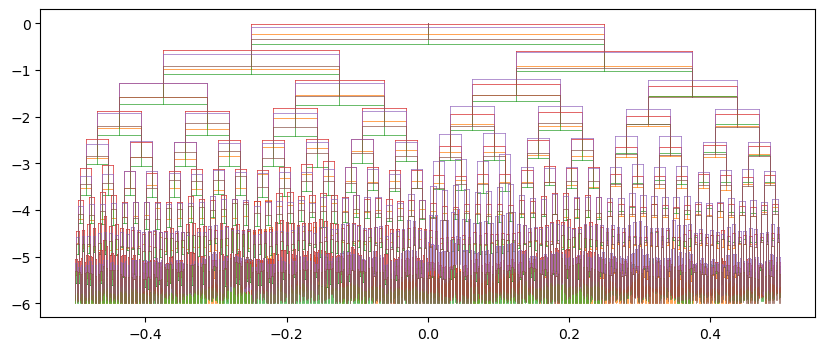

In [49]:

fig, ax = subplots(figsize=(10,4))

for i in 1:5
    branches = make_branches(init_cells[i], 0.1,10)
    for (x0, y0, x1, y1) in branches
        ax.plot([x0, x1], [y0, max(y1,-T_population)], "C$i",lw=0.5)
    end
end


fig


In [50]:
df_pops = []
i = 1
for r in init_cells
    df_pop = population_to_dataframe(r)
    df_pop.root_ind .= i
    i += 1
    push!(df_pops, df_pop)
end
df_pop = vcat(df_pops...);


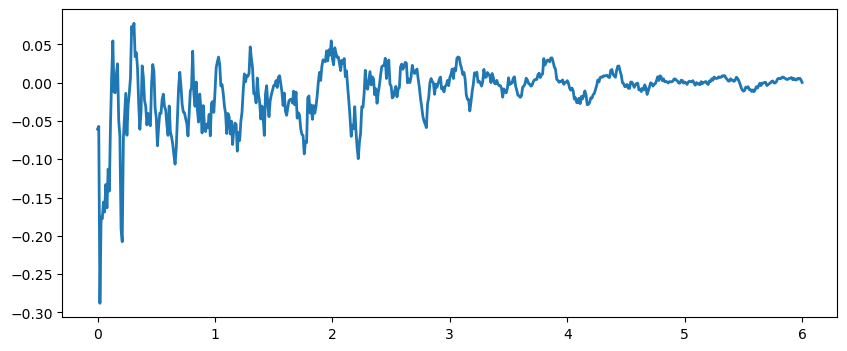

In [53]:
#df_pop.time = round.(df_pop.time, digits=5)
df_pop = df_pop[df_pop.time .< T_population,:]
grouped = groupby(df_pop, :time)
cor_df = combine(grouped, [:z1, :x1] => ((z, x) -> cor(z, x )) => :corr_z1_x1)

fig,ax = subplots(figsize=(10,4))
ax.plot(cor_df.time, cor_df.corr_z1_x1, "C0", lw=2)
fig

In [34]:
df_pop

Row,time,z1,z2,branch,x1,x2,x3,root_ind
,Float64,Float64,Float64,String,Float64,Float64,Float64,Int64
1,0.0,0.368778,0.313516,,0.567582,0.0570204,0.114044,1
2,0.0,0.379117,0.323855,,0.525123,-0.00117022,0.210817,1
3,0.0,0.389437,0.334175,,0.681826,-0.0355267,0.085346,1
4,0.0,0.39991,0.344648,,0.458533,-0.0740411,-0.0175618,1
5,0.0,0.410126,0.354864,,0.418964,-0.147337,-0.107355,1
6,0.0,0.420335,0.365073,,0.247867,0.0982222,-0.174614,1
7,0.1,0.430437,0.375175,,0.359781,0.105131,-0.255337,1
8,0.1,0.440642,0.38538,,0.439449,0.0803004,-0.245123,1
9,0.1,0.450902,0.39564,,0.477346,0.0868479,-0.0224795,1
